<a href="https://colab.research.google.com/github/bhavbhavyaa/Text_Generation/blob/main/Text_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
!pip install tensorflow

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import string
%matplotlib inline

In [115]:
response = open('/content/Speech.txt','r')
response = response.read()
print(response)
#print(response.text)

“ Good afternoon, and thank you and, wow. I am so privileged and so honored to be sharing this afternoon with all of you and these incredibly amazing women that are being honored today.
I’d like to extend my congratulations to each one of you, Octavia, Michelle, Kelly, Patty, and all fifty women that have been included in the impact report.
Your achievements not just inspire me but also so many others to work harder to be better and to make a dent wherever we can.
So, I’m very, very proud to be standing alongside you.
So, in life you know there are moments when you stop and ask yourself: “How did I get here?”
Like: “Why am I standing here?”
Well, this is definitely one of those moments for me and I find myself going back to the beginning, back to my roots.
I was born to incredible parents, amazing parents who served as doctors in the Indian Army.
I was the first born and as far back as I can remember I made my parents very proud and happy 99% of the time.
Okay, slight exaggerations of 

In [116]:
data = response.split("\n")
data[:6]

['“ Good afternoon, and thank you and, wow. I am so privileged and so honored to be sharing this afternoon with all of you and these incredibly amazing women that are being honored today.',
 'I’d like to extend my congratulations to each one of you, Octavia, Michelle, Kelly, Patty, and all fifty women that have been included in the impact report.',
 'Your achievements not just inspire me but also so many others to work harder to be better and to make a dent wherever we can.',
 'So, I’m very, very proud to be standing alongside you.',
 'So, in life you know there are moments when you stop and ask yourself: “How did I get here?”',
 'Like: “Why am I standing here?”']

In [117]:
print("Total lines:",len(data))

Total lines: 56


In [118]:
data = " ".join(data)
data

'“ Good afternoon, and thank you and, wow. I am so privileged and so honored to be sharing this afternoon with all of you and these incredibly amazing women that are being honored today. I’d like to extend my congratulations to each one of you, Octavia, Michelle, Kelly, Patty, and all fifty women that have been included in the impact report. Your achievements not just inspire me but also so many others to work harder to be better and to make a dent wherever we can. So, I’m very, very proud to be standing alongside you. So, in life you know there are moments when you stop and ask yourself: “How did I get here?” Like: “Why am I standing here?” Well, this is definitely one of those moments for me and I find myself going back to the beginning, back to my roots. I was born to incredible parents, amazing parents who served as doctors in the Indian Army. I was the first born and as far back as I can remember I made my parents very proud and happy 99% of the time. Okay, slight exaggerations of

In [119]:
def clean(doc):
    tokens = doc.split()
    table = str.maketrans("","",string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word.lower() for word in tokens]
    return tokens

In [120]:
tokens = clean(data)

In [121]:
length = 50 + 1
lines = []
for i in range(length,len(tokens)):
    sequence = tokens[i-length:i]
    line = " ".join(sequence)
    lines.append(line)
print(len(lines)) 
print(lines)   

1067
['good afternoon and thank you and wow i am so privileged and so honored to be sharing this afternoon with all of you and these incredibly amazing women that are being honored today like to extend my congratulations to each one of you octavia michelle kelly patty and all fifty women', 'afternoon and thank you and wow i am so privileged and so honored to be sharing this afternoon with all of you and these incredibly amazing women that are being honored today like to extend my congratulations to each one of you octavia michelle kelly patty and all fifty women that', 'and thank you and wow i am so privileged and so honored to be sharing this afternoon with all of you and these incredibly amazing women that are being honored today like to extend my congratulations to each one of you octavia michelle kelly patty and all fifty women that have', 'thank you and wow i am so privileged and so honored to be sharing this afternoon with all of you and these incredibly amazing women that are be

In [122]:
print("First line:",lines[0])
print("First token:",tokens[0])

First line: good afternoon and thank you and wow i am so privileged and so honored to be sharing this afternoon with all of you and these incredibly amazing women that are being honored today like to extend my congratulations to each one of you octavia michelle kelly patty and all fifty women
First token: good


In [123]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import load_model

In [124]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)
sequences = np.array(sequences)

In [125]:
X, y = sequences[:,:-1],sequences[:,-1]

In [126]:
print(X[0])
print(y[0])

[434 426   1 421  16   1 432   3 156  17 430   1  17 412   2  45 428  14
 426  56  37   6  16   1  76 424 155  75   7  36  74 412  44  46   2 418
   9 417   2 153  25   6  16 415 414 413 411   1  37 410]
75


In [127]:
X,y = sequences[:,:-1],sequences[:,-1]

In [128]:
vocab_size  = len(tokenizer.word_index) + 1

In [129]:
y = to_categorical(y,num_classes = vocab_size)

In [130]:
model = Sequential()
model.add(Embedding(vocab_size,50,input_length = 50))
model.add(LSTM(100, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(100,activation = "relu"))
model.add(Dense(vocab_size,activation = "softmax"))

In [131]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 50)            21750     
_________________________________________________________________
lstm_6 (LSTM)                (None, 50, 100)           60400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 435)               43935     
Total params: 216,585
Trainable params: 216,585
Non-trainable params: 0
_________________________________________________________________


In [132]:
model.compile(optimizer ="adam" , loss ="categorical_crossentropy"  ,metrics = ["accuracy"])

In [133]:
record = model.fit(X,y, epochs = 150)

Epoch 1/150
34/34 [==============================] - 7s 89ms/step - loss: 5.8574 - accuracy: 0.0403
Epoch 2/150
34/34 [==============================] - 3s 89ms/step - loss: 5.4902 - accuracy: 0.0272
Epoch 3/150
34/34 [==============================] - 3s 89ms/step - loss: 5.4272 - accuracy: 0.0403
Epoch 4/150
34/34 [==============================] - 3s 90ms/step - loss: 5.4047 - accuracy: 0.0440
Epoch 5/150
34/34 [==============================] - 3s 90ms/step - loss: 5.3888 - accuracy: 0.0440
Epoch 6/150
34/34 [==============================] - 3s 88ms/step - loss: 5.3876 - accuracy: 0.0356
Epoch 7/150
34/34 [==============================] - 3s 88ms/step - loss: 5.3758 - accuracy: 0.0375
Epoch 8/150
34/34 [==============================] - 3s 90ms/step - loss: 5.3501 - accuracy: 0.0403
Epoch 9/150
34/34 [==============================] - 3s 89ms/step - loss: 5.2694 - accuracy: 0.0440
Epoch 10/150
34/34 [==============================] - 3s 90ms/step - loss: 5.1383 - accuracy: 0.0412

In [134]:
model.save('model.h5')

In [135]:
model = load_model('model.h5')

loss at epoch 1: 5.8573899269104
loss at epoch 150: 0.10454291850328445


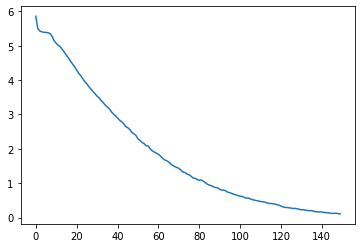

In [141]:
print(f"loss at epoch 1: {record.history['loss'][0]}")
print(f"loss at epoch 150: {record.history['loss'][149]}")
plt.plot(record.history['loss'])

In [142]:
seed_text = lines[10]

In [143]:
def generate_text_seq(model,tokenizer,text_seq_length,seed_text,n_words):
    text = []
    for _ in range(n_words):
        encoded = tokenizer.texts_to_sequences([seed_text])[0]
        encoded = pad_sequences([encoded],maxlen = text_seq_length,truncating = 'pre')
        
        y_predict = model.predict_classes(encoded)
        
        predicted_words = " "
        for word,index in tokenizer.word_index.items():
            if index == y_predict:
                predicted_word = word
                break
        seed_text = seed_text + " " + predicted_word
        text.append(predicted_word)
    return " ".join(text) 

In [144]:
generate_text_seq(model,tokenizer,50,seed_text,100)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'not just inspire me but also so many others to work harder to be better and to make a dent wherever we can so very very proud to be standing alongside you so in life you know there are moments when you stop and ask yourself did i get like am i standing well this is definitely one of those moments for me and i find myself going back to the beginning back to my roots i was born to incredible parents amazing parents who served as doctors in the indian army i was the first born and as far'